In [1]:
# 모델 구현 시간 체크
import time
# 시작시간 체크
start = time.time()

In [2]:
# 패키지 로딩
import tensorflow as tf
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 화면 디스플레이 전체 구간을 넓게
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 999) # pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 999) # pd.options.display.max_columns = 999
pd.set_option('display.width', 1000)

# 한글폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# 수입 데이터 로딩 (가상데이터)
df_org = pd.read_csv('train.csv')

In [4]:
# 데이터 사이즈 확인
df_org.shape

(76837, 24)

In [5]:
# 데이터 샘플 3개 확인
df_org.sample(3)

,신고번호,신고일자,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,검사결과코드,우범여부,핵심적발
32864,18853529,2020-04-17,30,E9RLO,1F3JM2X,NaN,NaN,C,B,87,11,11,14477.1,0.000000e+00,10,2118057,6309000000,JP,JP,A,8.0,A,0,0
34999,33189016,2020-04-24,16,9J612,OD3T6L3,655727V,PAVJZL,F,B,15,21,11,73193.8,5.484982e+07,40,4077006,8483109090,VN,KR,A,8.0,A,0,0
46067,44057666,2020-06-05,40,Z3S2U,2V439S2,5EYE4AE,OJ6WM3,F,E,83,21,11,21.2,1.152822e+03,10,4077106,8544422010,US,CN,C,0.0,F2,1,2


In [6]:
# 불필요한 변수 삭제
del df_org['검사결과코드']
del df_org['핵심적발']
del df_org['신고일자']
#del df_org['특송업체부호']
#del df_org['해외거래처부호']
#del df_org['신고인부호']
#del df_org['수입자부호']

In [7]:
df_org.columns

Index(['신고번호', '통관지세관부호', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '신고중량(KG)', '과세가격원화금액', '운송수단유형코드', '반입보세구역부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드', '관세율', '우범여부'], dtype='object')

In [8]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76837 entries, 0 to 76836
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   신고번호      76837 non-null  int64  
 1   통관지세관부호   76837 non-null  int64  
 2   신고인부호     76837 non-null  object 
 3   수입자부호     76829 non-null  object 
 4   해외거래처부호   50544 non-null  object 
 5   특송업체부호    25106 non-null  object 
 6   수입통관계획코드  76837 non-null  object 
 7   수입신고구분코드  76837 non-null  object 
 8   수입거래구분코드  76837 non-null  int64  
 9   수입종류코드    76837 non-null  int64  
 10  징수형태코드    76837 non-null  int64  
 11  신고중량(KG)  76837 non-null  float64
 12  과세가격원화금액  76837 non-null  float64
 13  운송수단유형코드  76837 non-null  int64  
 14  반입보세구역부호  76837 non-null  int64  
 15  HS10단위부호  76837 non-null  int64  
 16  적출국가코드    76837 non-null  object 
 17  원산지국가코드   76837 non-null  object 
 18  관세율구분코드   76837 non-null  object 
 19  관세율       76837 non-null  float64
 20  우범여부      76837 non-null  in

In [9]:
# 범주형 변수 지정
discrete_columns = [ '통관지세관부호',
       '수입통관계획코드', '신고인부호', '수입자부호','특송업체부호', '해외거래처부호', #신고일자', 
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드']

# 범주형 변수들을 문자열로 지정 ('object' -> 'string')
for var in discrete_columns:
    df_org[var] = df_org[var].astype(str)

In [10]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76837 entries, 0 to 76836
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   신고번호      76837 non-null  int64  
 1   통관지세관부호   76837 non-null  object 
 2   신고인부호     76837 non-null  object 
 3   수입자부호     76837 non-null  object 
 4   해외거래처부호   76837 non-null  object 
 5   특송업체부호    76837 non-null  object 
 6   수입통관계획코드  76837 non-null  object 
 7   수입신고구분코드  76837 non-null  object 
 8   수입거래구분코드  76837 non-null  object 
 9   수입종류코드    76837 non-null  object 
 10  징수형태코드    76837 non-null  object 
 11  신고중량(KG)  76837 non-null  float64
 12  과세가격원화금액  76837 non-null  float64
 13  운송수단유형코드  76837 non-null  object 
 14  반입보세구역부호  76837 non-null  object 
 15  HS10단위부호  76837 non-null  object 
 16  적출국가코드    76837 non-null  object 
 17  원산지국가코드   76837 non-null  object 
 18  관세율구분코드   76837 non-null  object 
 19  관세율       76837 non-null  float64
 20  우범여부      76837 non-null  in

In [11]:
# 수치형 변수 지정
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']

# 수치형 변수를 자연로그로 변환
for var in ['신고중량(KG)', '과세가격원화금액']:
    df_org[var] = df_org[var].apply(lambda x: np.log1p(x))

In [12]:
df_org.head(5)

,신고번호,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부
0,57298928,121,2O5A2,82ZHWNL,nan,TQ18AK,D,B,15,23,43,4.844187,8.593963,10,2106003,8481900000,US,US,A,8.0,1
1,85092852,30,305K5,5IS70LE,nan,nan,C,B,11,21,11,10.303820,13.258812,40,4077010,2106909099,US,US,A,8.0,0
2,63014158,20,CGMT6,GJ5KBL3,R9ZQOG7,nan,D,B,11,21,18,10.067242,10.862759,40,4077007,6307909000,US,US,A,10.0,0
3,40175917,40,QWUTG,PBYW02T,nan,nan,C,B,94,21,43,9.429564,14.388527,40,4077106,6505009090,CN,CN,A,8.0,0
4,11602631,30,0X1CO,MCX0GJB,4Z9PX0Y,nan,C,B,11,21,43,9.661015,15.987683,40,2006075,6204320000,CN,CN,FCN1,5.2,1


In [13]:
# 날짜 순에 따라 90:10 으로 훈련 및 테스트 데이터 분리
df_org_train = df_org.iloc[:int(len(df_org)*0.9), :]
df_org_test = df_org.iloc[int(len(df_org)*0.9):, :]

In [14]:
# 데이터 사이즈 확인
print(df_org_train.shape, df_org_test.shape)

(69153, 21) (7684, 21)


In [15]:
df_org.columns

Index(['신고번호', '통관지세관부호', '신고인부호', '수입자부호', '해외거래처부호', '특송업체부호', '수입통관계획코드', '수입신고구분코드', '수입거래구분코드', '수입종류코드', '징수형태코드', '신고중량(KG)', '과세가격원화금액', '운송수단유형코드', '반입보세구역부호', 'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드', '관세율', '우범여부'], dtype='object')

In [16]:
df_org.shape

(76837, 21)

In [17]:
# 범주형 변수 전처리 1단계: label encoding --> 각 범주형 변수가 갖는 클래스에 고유의 식별번호 부여
# 예) 수입자 상호: AAABB -> 1, 가나다라 -> 2, ...

label_encoding_ref = {}
for var in discrete_columns:
    label_encoding_ref[var] = {code: i+1 for i, code in enumerate(df_org_train[var].unique())} # 0 padding for unseen data in test
    #print(label_encoding_ref[var])
    df_org_train[var] = [label_encoding_ref[var][x] for x in df_org_train[var]]
    df_org_test[var] = [label_encoding_ref[var].get(x,0) for x in df_org_test[var]]

df_org_train.reset_index(drop=True, inplace=True)
df_org_test.reset_index(drop=True, inplace=True)

<ipython-input-17-6ab5b30a190e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org_train[var] = [label_encoding_ref[var][x] for x in df_org_train[var]]
<ipython-input-17-6ab5b30a190e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_org_test[var] = [label_encoding_ref[var].get(x,0) for x in df_org_test[var]]


In [18]:
# 트레인데이터 샘플 확인
df_org_train.sample(3)

,신고번호,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부
64723,32074506,4,21,2427,286,2,2,1,1,2,1,9.270297,13.533792,2,37,869,13,74,8,0.0,1
27674,84150133,3,71,3254,187,2,3,1,1,2,2,7.115420,9.525740,2,29,101,2,2,2,3.2,0
55478,43710334,4,130,6807,633,2,1,1,3,2,2,8.459818,16.869569,1,37,1669,13,49,1,8.0,0


In [19]:
# 테스트데이터 샘플 확인
df_org_test.sample(3)

,신고번호,통관지세관부호,신고인부호,수입자부호,해외거래처부호,특송업체부호,수입통관계획코드,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,신고중량(KG),과세가격원화금액,운송수단유형코드,반입보세구역부호,HS10단위부호,적출국가코드,원산지국가코드,관세율구분코드,관세율,우범여부
1318,33911791,5,46,664,623,2,4,2,2,2,2,5.644032,12.865453,1,382,884,5,6,3,6.5,0
4619,35339027,3,36,121,455,61,1,1,1,2,2,8.166557,9.019389,1,169,3,1,1,1,10.0,0
4809,15654827,4,236,1610,3219,46,4,1,21,2,2,8.687695,15.230130,1,103,1382,2,2,2,0.0,0


In [20]:
# one-hot-encoding
# 예) A,B,C 3개의 클래스가 있는 범주형 변수를 다음과 같이 변환
# A -> [1,0,0] / B -> [0,1,0] / C -> [0,0,1]

# 원핫인코더 로딩
from sklearn.preprocessing import  OneHotEncoder
# 원핫인코더 활성화
xgbohe = OneHotEncoder(categories="auto", handle_unknown='ignore')
# 훈련데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_org_train_cat = xgbohe.fit_transform(df_org_train[discrete_columns])
df_org_train_cat = pd.DataFrame(df_org_train_cat.toarray(), 
                                columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_org_train_num = df_org_train[numeric_columns]

# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_org_train = pd.concat([df_org_train_num, df_org_train_cat], axis=1)

In [21]:
# 훈련데이터 샘플 확인
df_org_train.head(1)

,신고중량(KG),과세가격원화금액,관세율,우범여부,통관지세관부호_1,통관지세관부호_2,통관지세관부호_3,통관지세관부호_4,통관지세관부호_5,통관지세관부호_6,통관지세관부호_7,통관지세관부호_8,통관지세관부호_9,통관지세관부호_10,통관지세관부호_11,통관지세관부호_12,통관지세관부호_13,통관지세관부호_14,통관지세관부호_15,통관지세관부호_16,통관지세관부호_17,통관지세관부호_18,통관지세관부호_19,통관지세관부호_20,통관지세관부호_21,통관지세관부호_22,통관지세관부호_23,통관지세관부호_24,통관지세관부호_25,통관지세관부호_26,통관지세관부호_27,통관지세관부호_28,통관지세관부호_29,통관지세관부호_30,통관지세관부호_31,통관지세관부호_32,통관지세관부호_33,통관지세관부호_34,통관지세관부호_35,통관지세관부호_36,통관지세관부호_37,통관지세관부호_38,통관지세관부호_39,통관지세관부호_40,수입통관계획코드_1,수입통관계획코드_2,수입통관계획코드_3,수입통관계획코드_4,수입통관계획코드_5,수입통관계획코드_6,수입통관계획코드_7,신고인부호_1,신고인부호_2,신고인부호_3,신고인부호_4,신고인부호_5,신고인부호_6,신고인부호_7,신고인부호_8,신고인부호_9,신고인부호_10,신고인부호_11,신고인부호_12,신고인부호_13,신고인부호_14,신고인부호_15,신고인부호_16,신고인부호_17,신고인부호_18,신고인부호_19,신고인부호_20,신고인부호_21,신고인부호_22,신고인부호_23,신고인부호_24,신고인부호_25,신고인부호_26,신고인부호_27,신고인부호_28,신고인부호_29,신고인부호_30,신고인부호_31,신고인부호_32,신고인부호_33,신고인부호_34,신고인부호_35,신고인부호_36,신고인부호_37,신고인부호_38,신고인부호_39,신고인부호_40,신고인부호_41,신고인부호_42,신고인부호_43,신고인부호_44,신고인부호_45,신고인부호_46,신고인부호_47,신고인부호_48,신고인부호_49,신고인부호_50,신고인부호_51,신고인부호_52,신고인부호_53,신고인부호_54,신고인부호_55,신고인부호_56,신고인부호_57,신고인부호_58,신고인부호_59,신고인부호_60,신고인부호_61,신고인부호_62,신고인부호_63,신고인부호_64,신고인부호_65,신고인부호_66,신고인부호_67,신고인부호_68,신고인부호_69,신고인부호_70,신고인부호_71,신고인부호_72,신고인부호_73,신고인부호_74,신고인부호_75,신고인부호_76,신고인부호_77,신고인부호_78,신고인부호_79,신고인부호_80,신고인부호_81,신고인부호_82,신고인부호_83,신고인부호_84,신고인부호_85,신고인부호_86,신고인부호_87,신고인부호_88,신고인부호_89,신고인부호_90,신고인부호_91,신고인부호_92,신고인부호_93,신고인부호_94,신고인부호_95,신고인부호_96,신고인부호_97,신고인부호_98,신고인부호_99,신고인부호_100,신고인부호_101,신고인부호_102,신고인부호_103,신고인부호_104,신고인부호_105,신고인부호_106,신고인부호_107,신고인부호_108,신고인부호_109,신고인부호_110,신고인부호_111,신고인부호_112,신고인부호_113,신고인부호_114,신고인부호_115,신고인부호_116,신고인부호_117,신고인부호_118,신고인부호_119,신고인부호_120,신고인부호_121,신고인부호_122,신고인부호_123,신고인부호_124,신고인부호_125,신고인부호_126,신고인부호_127,신고인부호_128,신고인부호_129,신고인부호_130,신고인부호_131,신고인부호_132,신고인부호_133,신고인부호_134,신고인부호_135,신고인부호_136,신고인부호_137,신고인부호_138,신고인부호_139,신고인부호_140,신고인부호_141,신고인부호_142,신고인부호_143,신고인부호_144,신고인부호_145,신고인부호_146,신고인부호_147,신고인부호_148,신고인부호_149,신고인부호_150,신고인부호_151,신고인부호_152,신고인부호_153,신고인부호_154,신고인부호_155,신고인부호_156,신고인부호_157,신고인부호_158,신고인부호_159,신고인부호_160,신고인부호_161,신고인부호_162,신고인부호_163,신고인부호_164,신고인부호_165,신고인부호_166,신고인부호_167,신고인부호_168,신고인부호_169,신고인부호_170,신고인부호_171,신고인부호_172,신고인부호_173,신고인부호_174,신고인부호_175,신고인부호_176,신고인부호_177,신고인부호_178,신고인부호_179,신고인부호_180,신고인부호_181,신고인부호_182,신고인부호_183,신고인부호_184,신고인부호_185,신고인부호_186,신고인부호_187,신고인부호_188,신고인부호_189,신고인부호_190,신고인부호_191,신고인부호_192,신고인부호_193,신고인부호_194,신고인부호_195,신고인부호_196,신고인부호_197,신고인부호_198,신고인부호_199,신고인부호_200,신고인부호_201,신고인부호_202,신고인부호_203,신고인부호_204,신고인부호_205,신고인부호_206,신고인부호_207,신고인부호_208,신고인부호_209,신고인부호_210,신고인부호_211,신고인부호_212,신고인부호_213,신고인부호_214,신고인부호_215,신고인부호_216,신고인부호_217,신고인부호_218,신고인부호_219,신고인부호_220,신고인부호_221,신고인부호_222,신고인부호_223,신고인부호_224,신고인부호_225,신고인부호_226,신고인부호_227,신고인부호_228,신고인부호_229,신고인부호_230,신고인부호_231,신고인부호_232,신고인부호_233,신고인부호_234,신고인부호_235,신고인부호_236,신고인부호_237,신고인부호_238,신고인부호_239,신고인부호_240,신고인부호_241,신고인부호_242,신고인부호_243,신고인부호_244,신고인부호_245,신고인부호_246,신고인부호_247,신고인부호_248,신고인부호_249,신고인부호_250,신고인부호_251,신고인부호_252,신고인부호_253,신고인부호_254,신고인부호_255,신고인부호_256,신고인부호_257,신고인부호_258,신고인부호_259,신고인부호_260,신고인부호_261,신고인부호_262,신고인부호_263,신고인부호_264,신고인부호_265,신고인부호_266,신고인부호_267,신고인부호_268,신고인부호_269,신고인부호_270,신고인부호_271,신고인부호_272,신고인부호_273,신고인부호_274,신고인부호_275,신고인부호_276,신고인부호_277,신고인부호_278,신고인부호_279,신고인부호_280,신고인부호_281,신고인부호_282,신고인부호_283,신고인부호_284,신고인부호_285,신고인부호_286,신고인부호_287,신고인부호_288,신고인부호_289,신고인부호_290,신고인부호_291,신고인부호_292,신고인부호_293,신고인부호_294,신고인부호_295,신고인부호_296,신고인부호_297,신고인부호_298,신고인부호_299,신고인부호_300,신고인부호_301,신고인부호_302,신고인부호_303,신고인부호_304,신고인부호_305,신고인부호_306,신고인부호_307,신고인부호_308,신고인부호_309,신고인부호_310,신고인부호_311,신고인부호_312,신고인부호_313,신고인부호_314,신고인부호_315,신고인부호_316,신고인부호_317,신고인부호_318,신고인부호_319,신고인부호_320,신고인부호_321,신고인부호_322,신고인부호_323,신고인부호_324,신고인부호_325,신고인부호_326,신고인부호_327,신고인부호_328,신고인부호_329,신고인부호_330,신고인부호_331,신고인부호_332,신고인부호_333,신고인부호_334,신고인부호_335,신고인부호_336,신고인부호_337,신고인부호_338,신고인부호_339,신고인부호_340,신고인부호_341,신고인부호_342,신고인부호_343,신고인부호_344,신고인부호_345,신고인부호_346,신고인부호_347,신고인부호_348,신고인부호_349,신고인부호_350,신고인부호_351,신고인부호_352,신고인부호_353,신고인부호_354,신고인부호_355,신고인부호_356,신고인부호_357,신고

In [22]:
# 테스트데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_org_test_cat = xgbohe.transform(df_org_test[discrete_columns])
df_org_test_cat = pd.DataFrame(df_org_test_cat.toarray(), 
                               columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_org_test_num = df_org_test[numeric_columns]
# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_org_test = pd.concat([df_org_test_num, df_org_test_cat], axis=1)

In [23]:
# 테스트데이터 샘플 확인
df_org_test.head(1)

,신고중량(KG),과세가격원화금액,관세율,우범여부,통관지세관부호_1,통관지세관부호_2,통관지세관부호_3,통관지세관부호_4,통관지세관부호_5,통관지세관부호_6,통관지세관부호_7,통관지세관부호_8,통관지세관부호_9,통관지세관부호_10,통관지세관부호_11,통관지세관부호_12,통관지세관부호_13,통관지세관부호_14,통관지세관부호_15,통관지세관부호_16,통관지세관부호_17,통관지세관부호_18,통관지세관부호_19,통관지세관부호_20,통관지세관부호_21,통관지세관부호_22,통관지세관부호_23,통관지세관부호_24,통관지세관부호_25,통관지세관부호_26,통관지세관부호_27,통관지세관부호_28,통관지세관부호_29,통관지세관부호_30,통관지세관부호_31,통관지세관부호_32,통관지세관부호_33,통관지세관부호_34,통관지세관부호_35,통관지세관부호_36,통관지세관부호_37,통관지세관부호_38,통관지세관부호_39,통관지세관부호_40,수입통관계획코드_1,수입통관계획코드_2,수입통관계획코드_3,수입통관계획코드_4,수입통관계획코드_5,수입통관계획코드_6,수입통관계획코드_7,신고인부호_1,신고인부호_2,신고인부호_3,신고인부호_4,신고인부호_5,신고인부호_6,신고인부호_7,신고인부호_8,신고인부호_9,신고인부호_10,신고인부호_11,신고인부호_12,신고인부호_13,신고인부호_14,신고인부호_15,신고인부호_16,신고인부호_17,신고인부호_18,신고인부호_19,신고인부호_20,신고인부호_21,신고인부호_22,신고인부호_23,신고인부호_24,신고인부호_25,신고인부호_26,신고인부호_27,신고인부호_28,신고인부호_29,신고인부호_30,신고인부호_31,신고인부호_32,신고인부호_33,신고인부호_34,신고인부호_35,신고인부호_36,신고인부호_37,신고인부호_38,신고인부호_39,신고인부호_40,신고인부호_41,신고인부호_42,신고인부호_43,신고인부호_44,신고인부호_45,신고인부호_46,신고인부호_47,신고인부호_48,신고인부호_49,신고인부호_50,신고인부호_51,신고인부호_52,신고인부호_53,신고인부호_54,신고인부호_55,신고인부호_56,신고인부호_57,신고인부호_58,신고인부호_59,신고인부호_60,신고인부호_61,신고인부호_62,신고인부호_63,신고인부호_64,신고인부호_65,신고인부호_66,신고인부호_67,신고인부호_68,신고인부호_69,신고인부호_70,신고인부호_71,신고인부호_72,신고인부호_73,신고인부호_74,신고인부호_75,신고인부호_76,신고인부호_77,신고인부호_78,신고인부호_79,신고인부호_80,신고인부호_81,신고인부호_82,신고인부호_83,신고인부호_84,신고인부호_85,신고인부호_86,신고인부호_87,신고인부호_88,신고인부호_89,신고인부호_90,신고인부호_91,신고인부호_92,신고인부호_93,신고인부호_94,신고인부호_95,신고인부호_96,신고인부호_97,신고인부호_98,신고인부호_99,신고인부호_100,신고인부호_101,신고인부호_102,신고인부호_103,신고인부호_104,신고인부호_105,신고인부호_106,신고인부호_107,신고인부호_108,신고인부호_109,신고인부호_110,신고인부호_111,신고인부호_112,신고인부호_113,신고인부호_114,신고인부호_115,신고인부호_116,신고인부호_117,신고인부호_118,신고인부호_119,신고인부호_120,신고인부호_121,신고인부호_122,신고인부호_123,신고인부호_124,신고인부호_125,신고인부호_126,신고인부호_127,신고인부호_128,신고인부호_129,신고인부호_130,신고인부호_131,신고인부호_132,신고인부호_133,신고인부호_134,신고인부호_135,신고인부호_136,신고인부호_137,신고인부호_138,신고인부호_139,신고인부호_140,신고인부호_141,신고인부호_142,신고인부호_143,신고인부호_144,신고인부호_145,신고인부호_146,신고인부호_147,신고인부호_148,신고인부호_149,신고인부호_150,신고인부호_151,신고인부호_152,신고인부호_153,신고인부호_154,신고인부호_155,신고인부호_156,신고인부호_157,신고인부호_158,신고인부호_159,신고인부호_160,신고인부호_161,신고인부호_162,신고인부호_163,신고인부호_164,신고인부호_165,신고인부호_166,신고인부호_167,신고인부호_168,신고인부호_169,신고인부호_170,신고인부호_171,신고인부호_172,신고인부호_173,신고인부호_174,신고인부호_175,신고인부호_176,신고인부호_177,신고인부호_178,신고인부호_179,신고인부호_180,신고인부호_181,신고인부호_182,신고인부호_183,신고인부호_184,신고인부호_185,신고인부호_186,신고인부호_187,신고인부호_188,신고인부호_189,신고인부호_190,신고인부호_191,신고인부호_192,신고인부호_193,신고인부호_194,신고인부호_195,신고인부호_196,신고인부호_197,신고인부호_198,신고인부호_199,신고인부호_200,신고인부호_201,신고인부호_202,신고인부호_203,신고인부호_204,신고인부호_205,신고인부호_206,신고인부호_207,신고인부호_208,신고인부호_209,신고인부호_210,신고인부호_211,신고인부호_212,신고인부호_213,신고인부호_214,신고인부호_215,신고인부호_216,신고인부호_217,신고인부호_218,신고인부호_219,신고인부호_220,신고인부호_221,신고인부호_222,신고인부호_223,신고인부호_224,신고인부호_225,신고인부호_226,신고인부호_227,신고인부호_228,신고인부호_229,신고인부호_230,신고인부호_231,신고인부호_232,신고인부호_233,신고인부호_234,신고인부호_235,신고인부호_236,신고인부호_237,신고인부호_238,신고인부호_239,신고인부호_240,신고인부호_241,신고인부호_242,신고인부호_243,신고인부호_244,신고인부호_245,신고인부호_246,신고인부호_247,신고인부호_248,신고인부호_249,신고인부호_250,신고인부호_251,신고인부호_252,신고인부호_253,신고인부호_254,신고인부호_255,신고인부호_256,신고인부호_257,신고인부호_258,신고인부호_259,신고인부호_260,신고인부호_261,신고인부호_262,신고인부호_263,신고인부호_264,신고인부호_265,신고인부호_266,신고인부호_267,신고인부호_268,신고인부호_269,신고인부호_270,신고인부호_271,신고인부호_272,신고인부호_273,신고인부호_274,신고인부호_275,신고인부호_276,신고인부호_277,신고인부호_278,신고인부호_279,신고인부호_280,신고인부호_281,신고인부호_282,신고인부호_283,신고인부호_284,신고인부호_285,신고인부호_286,신고인부호_287,신고인부호_288,신고인부호_289,신고인부호_290,신고인부호_291,신고인부호_292,신고인부호_293,신고인부호_294,신고인부호_295,신고인부호_296,신고인부호_297,신고인부호_298,신고인부호_299,신고인부호_300,신고인부호_301,신고인부호_302,신고인부호_303,신고인부호_304,신고인부호_305,신고인부호_306,신고인부호_307,신고인부호_308,신고인부호_309,신고인부호_310,신고인부호_311,신고인부호_312,신고인부호_313,신고인부호_314,신고인부호_315,신고인부호_316,신고인부호_317,신고인부호_318,신고인부호_319,신고인부호_320,신고인부호_321,신고인부호_322,신고인부호_323,신고인부호_324,신고인부호_325,신고인부호_326,신고인부호_327,신고인부호_328,신고인부호_329,신고인부호_330,신고인부호_331,신고인부호_332,신고인부호_333,신고인부호_334,신고인부호_335,신고인부호_336,신고인부호_337,신고인부호_338,신고인부호_339,신고인부호_340,신고인부호_341,신고인부호_342,신고인부호_343,신고인부호_344,신고인부호_345,신고인부호_346,신고인부호_347,신고인부호_348,신고인부호_349,신고인부호_350,신고인부호_351,신고인부호_352,신고인부호_353,신고인부호_354,신고인부호_355,신고인부호_356,신고인부호_357,신고

In [24]:
# 모델예측 대상인 우범여부 변수 분리
org_train_y = df_org_train.pop('우범여부')
org_test_y = df_org_test.pop('우범여부')

In [25]:
# 훈련데이터와 테스트데이터에서 우범건수 비교
from collections import Counter
cnt_train = Counter(org_train_y)
cnt_test = Counter(org_test_y)

print(f"훈련  데이터 비우범건수: {cnt_train[0]}, 훈련  데이터 우범건수: {cnt_train[1]}")
print(f"테스트데이터 비우범건수: {cnt_test[0]}, 테스트데이터 우범건수: {cnt_test[1]}")

훈련  데이터 비우범건수: 53371, 훈련  데이터 우범건수: 15782
테스트데이터 비우범건수: 5894, 테스트데이터 우범건수: 1790


In [26]:
org_train_y.shape

(69153,)

In [27]:
org_test_y.shape

(7684,)

In [28]:
# RF 모델 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,roc_auc_score

In [29]:
# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(max_depth = 100, random_state = 0)
rf.fit(df_org_train, org_train_y)

RandomForestClassifier(max_depth=100, random_state=0)

In [30]:
# 랜덤 포레스트 모델 정확도 확인
train_pred = rf.predict_proba(df_org_train)[:,1]
rf_train_auc = roc_auc_score(org_train_y, train_pred)
print("Train 데이터 정확도 :",rf_train_auc)
test_pred = rf.predict_proba(df_org_test)[:,1]
rf_test_auc = roc_auc_score(org_test_y, test_pred)
print("Test 데이터 정확도 :",rf_test_auc)

Train 데이터 정확도 : 0.9979988000063473
Test 데이터 정확도 : 0.8307445503712704


In [31]:
# 검사율에 따른 우범예측 함수 생성

def inspection_performance(predicted_fraud, test_fraud):
    
    # Set default values before a loop
    
    Inspect_Rate = []
    Precision=[]
    Recall=[]
    
    # Create a loop for making confusion matrix at each inspection rate

    for i in range(0,101,1):
        
        # Find the ith value in ascending order.
        threshold = np.percentile(predicted_fraud, i)
        # Precision = number of frauds / number of inspection
        precision = np.mean(test_fraud[predicted_fraud >= threshold])
        # Recall = number of inspected frauds / number of frauds
        recall = sum(test_fraud[predicted_fraud >= threshold])/sum(test_fraud)
        # Save values
        Inspect_Rate.append(100-i)
        Precision.append(precision)
        Recall.append(recall)
        
    
    compiled_conf_matrix = pd.DataFrame({
        
        'Inspect_Rate':Inspect_Rate,
        'Precision':Precision,
        'Recall':Recall
    })

    return compiled_conf_matrix

In [32]:
# 검사율에 따른 우범예측 
basic_performance = inspection_performance(test_pred, org_test_y.astype(float))

In [33]:
# 검사율 1~10% 지정 시 Precision 및 Recall 분석
# Precision (적중률) = (검사선별된 우범건수)/(검사선별 건수)
# Recall (적발률) = (검사선별된 우범건수) / (전체 우범건수)
basic_performance.iloc[range(99,89,-1),:]

,Inspect_Rate,Precision,Recall
99,1,0.675325,0.029050
98,2,0.707792,0.060894
97,3,0.696970,0.089944
96,4,0.701299,0.120670
95,5,0.688312,0.148045
94,6,0.698482,0.179888
93,7,0.678439,0.203911
92,8,0.681301,0.234078
91,9,0.671965,0.259777
90,10,0.669701,0.287709


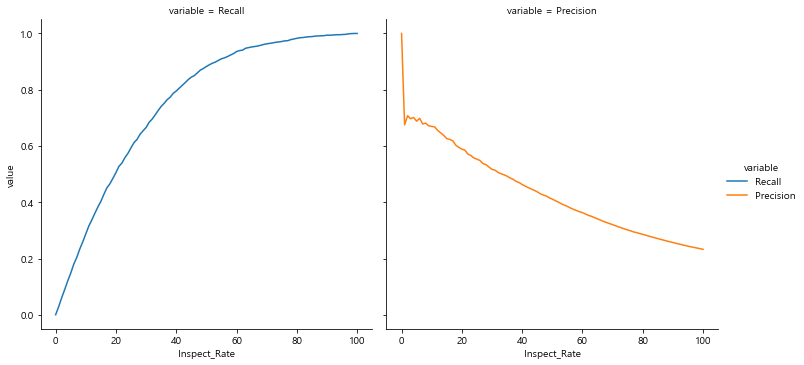

In [34]:
# 검사선별률에 따른 적중률 및 적발률 시각화
data = pd.melt(basic_performance, 
               id_vars = ['Inspect_Rate'],
               value_vars = ['Recall','Precision'])

sns.relplot(data=data,
            kind='line',
            x="Inspect_Rate", 
            y="value", 
            hue='variable',
            col="variable")
plt.savefig('recall & precision.png')

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

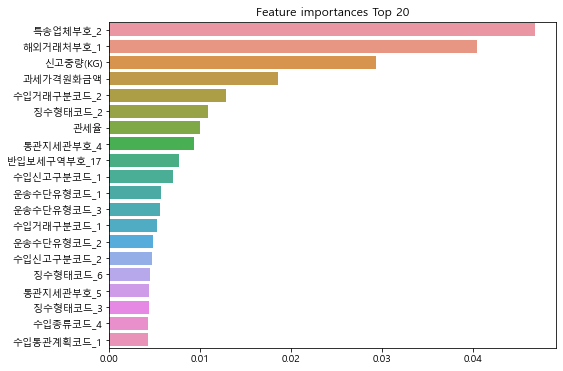

In [36]:
# 모델에 기여도가 높은 변수 시각화
importances_values = rf.feature_importances_
importances = pd.Series(importances_values, index=df_org_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [37]:
# 모델 종료 시간 확인
end = time.time()
# 모델 구동 시간 계산
print(f"모델구동시간 : {end-start} sec.")

모델구동시간 : 642.6299228668213 sec.


In [38]:
# 시작시간 체크
start = time.time()

In [39]:
# 수입 데이터 로딩 (가상데이터)
df_org_train = pd.read_csv('train.csv')
df_org_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('submission.csv')

In [40]:
# 불필요한 변수 삭제
del df_org_train['검사결과코드']
del df_org_train['핵심적발']
del df_org_train['신고일자']
del df_org_test['신고일자']

In [41]:
# 범주형 변수 지정
discrete_columns = [ '통관지세관부호',
       '수입통관계획코드', '특송업체부호', '해외거래처부호',
       '수입신고구분코드', '수입거래구분코드',
       '수입종류코드', '징수형태코드', 
       '운송수단유형코드', '반입보세구역부호', 
       'HS10단위부호', '적출국가코드', '원산지국가코드', '관세율구분코드']

# 범주형 변수들을 문자열로 지정 ('object' -> 'string')
for var in discrete_columns:
    df_org_train[var] = df_org_train[var].astype(str)
    df_org_test[var] = df_org_test[var].astype(str)

In [42]:
# 수치형 변수 지정
numeric_columns = ['신고중량(KG)', '과세가격원화금액', '관세율', '우범여부']
numeric_columns_test = ['신고중량(KG)', '과세가격원화금액', '관세율']

# 수치형 변수를 자연로그로 변환
for var in ['신고중량(KG)', '과세가격원화금액']:
    df_org_train[var] = df_org_train[var].apply(lambda x: np.log1p(x))
    df_org_test[var] = df_org_test[var].apply(lambda x: np.log1p(x))

In [43]:
# 범주형 변수 전처리 1단계: label encoding --> 각 범주형 변수가 갖는 클래스에 고유의 식별번호 부여
# 예) 수입자 상호: AAABB -> 1, 가나다라 -> 2, ...

label_encoding_ref = {}
for var in discrete_columns:
    label_encoding_ref[var] = {code: i+1 for i, code in enumerate(df_org_train[var].unique())} # 0 padding for unseen data in test
    #print(label_encoding_ref[var])
    df_org_train[var] = [label_encoding_ref[var][x] for x in df_org_train[var]]
    df_org_test[var] = [label_encoding_ref[var].get(x,0) for x in df_org_test[var]]

df_org_train.reset_index(drop=True, inplace=True)
df_org_test.reset_index(drop=True, inplace=True)

In [44]:
# one-hot-encoding
# 예) A,B,C 3개의 클래스가 있는 범주형 변수를 다음과 같이 변환
# A -> [1,0,0] / B -> [0,1,0] / C -> [0,0,1]

# 원핫인코더 로딩
from sklearn.preprocessing import  OneHotEncoder
# 원핫인코더 활성화
xgbohe = OneHotEncoder(categories="auto", handle_unknown='ignore')
# 훈련데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_org_train_cat = xgbohe.fit_transform(df_org_train[discrete_columns])
df_org_train_cat = pd.DataFrame(df_org_train_cat.toarray(), 
                                columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_org_train_num = df_org_train[numeric_columns]

# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_org_train = pd.concat([df_org_train_num, df_org_train_cat], axis=1)

In [45]:
# 테스트데이터: 범주형 변수만 분리하여 원핫인코딩 적용
df_org_test_cat = xgbohe.transform(df_org_test[discrete_columns])
df_org_test_cat = pd.DataFrame(df_org_test_cat.toarray(), 
                               columns = xgbohe.get_feature_names(discrete_columns))
# 수치형 변수 분리
df_org_test_num = df_org_test[numeric_columns_test]
# 원핫인코딩된 범주형 변수와 수치형 변수 재결합
df_org_test = pd.concat([df_org_test_num, df_org_test_cat], axis=1)

In [46]:
# 모델예측 대상인 우범여부 변수 분리
org_train_y = df_org_train.pop('우범여부')

In [47]:
# 랜덤 포레스트 모델 학습
rf = RandomForestClassifier(max_depth = 100, random_state = 0)
rf.fit(df_org_train,org_train_y)

RandomForestClassifier(max_depth=100, random_state=0)

In [49]:
# Submission 파일 작성
test_pred = rf.predict(df_org_test)
df_submission['우범여부'] = test_pred
df_submission.to_csv('df_submission.csv', index = False)

In [50]:
# 모델 종료 시간 확인
end = time.time()
# 모델 구동 시간 계산
print(f"모델구동시간 : {end-start} sec.")

모델구동시간 : 502.11291098594666 sec.
